In [5]:
from datasets import getNoduleInfoList
import SimpleITK as sitk
nodules = getNoduleInfoList(['sclc'])

In [6]:
shapes_mm = []
for nodule in nodules:
    try:
        nodule_obj = nodule.image_type(nodule.file_path, nodule.center_lps)
        seg = nodule_obj.extract_bounding_box_nodule(True, 0,[1]*3)
        seg_shape = seg.GetSize()
        spacing = seg.GetSpacing()
        shapes_mm.append([seg_shape[i] * spacing[i] for i in range(3)])
        break
    except:
        pass
    
        

In [7]:
spacing

(0.556641, 0.556641, 1.2499999999999998)

In [2]:
import pickle
with open("temp.pkl", "rb") as f:
    shapes_mm = pickle.load(f)

In [4]:
result = list(map(max, zip(*shapes_mm)))
print(result)

[76.833996, 102.445328, 105.00000000000004]


In [ ]:
from datasets import get_fixed_size_nodule
pixel_sizes = []
for nodule in nodules:
    nodule = nodules[0]
    nodule_obj = nodule.image_type(nodule.file_path, nodule.center_lps)
    pixel_sizes.append(nodule_obj.image.GetSpacing())
    box = nodule_obj.extract_fixed_size_nodule([80, 110, 130])
    # pixel_sizes.append(sitk.GetArrayFromImage(box).shape)

In [38]:
set(pixel_sizes)

{(0.556641, 0.556641, 1.2499999999999998)}

In [ ]:
import matplotlib.pyplot as plt
from datasets import resample_image_to_thickness

resampled_sizes = []
for nodule in nodules:
    nodule_obj = nodule.image_type(nodule.file_path, nodule.center_lps)
    box = nodule_obj.extract_fixed_size_nodule([65, 65, 80])
    resampled_nodule = resample_image_to_thickness(box, [1,1,1])
    b = sitk.GetArrayFromImage(box)
    resampled_sizes.append(b.shape)
    plt.imshow(b[32], cmap="grey")
    break

2025-04-05 16:23:25,514 INFO     pid:1563227 datasets:089:get_fixed_size_nodule Slicing nodule from image for /data/kaplinsp/transformation/A462715.nrrd


torch.Size([1, 96, 96, 96])


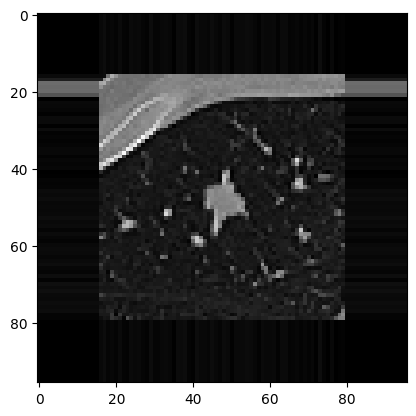

In [5]:
from datasets import get_fixed_size_nodule
import matplotlib.pyplot as plt
nodule = nodules[56]
im = get_fixed_size_nodule(
    nodule.file_path,
    nodule.image_type,
    nodule.center_lps,
    [96] * 3,
    [65, 65, 80],
    [1., 1., 1.],
)
print(im.shape)
plt.imshow(im[0][48], cmap="grey")

In [12]:
import matplotlib.pyplot as plt
from datasets import resample_image_to_thickness

resampled_sizes = []
for nodule in nodules:
    nodule_obj = nodule.image_type(nodule.file_path, nodule.center_lps)
    box = nodule_obj.extract_bounding_box_nodule(
        preprocess=True, dilation_mm=20, box_size=[65, 65, 80]
    )
    resampled_nodule = resample_image_to_thickness(box, [1,1,1])
    b = sitk.GetArrayFromImage(box)
    resampled_sizes.append(b.shape)


In [17]:
import numpy as np
list(map(np.argmax, zip(*resampled_sizes)))

[146, 131, 131]

In [8]:
import monai, torch
import matplotlib.pyplot as plt
from datasets import resample_image_to_thickness

nodule = nodules[72]
nodule_obj = nodule.image_type(nodule.file_path, nodule.center_lps)
box = nodule_obj.extract_bounding_box_nodule(
    preprocess=True, dilation_mm=10, box_size=[65, 65, 80]
)
resampled_nodule = resample_image_to_thickness(box, [1,1,1])
nodule_tensor = torch.from_numpy(sitk.GetArrayFromImage(resampled_nodule)).unsqueeze(0)
print(nodule_tensor.shape)
transform = monai.transforms.ResizeWithPadOrCrop([64]*3, method="symmetric", mode="constant", lazy=False)
nodule_tensor = transform(nodule_tensor)


torch.Size([1, 70, 64, 58])


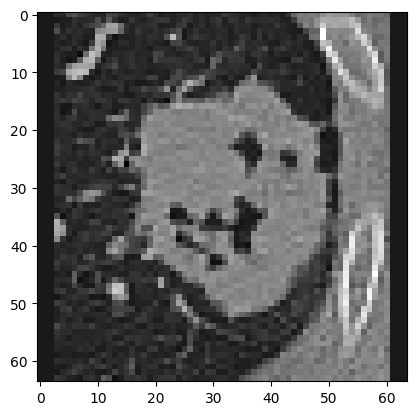

In [9]:
plt.imshow(nodule_tensor[0][32], cmap="grey")